This Notebook is inspired by the pytorch tutorial of the youtube-channel Assembly AI, "Pytorch Crash Course - Getting Started with Deep Learning"

In [1]:
import cv2 as cv
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import torchvision
from torchvision import transforms
import torch
import torch.nn.functional as F

torch.cuda.is_available()
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [2]:
#Hyperparameters
num_epochs = 50
batch_size = 75
learning_rate = 0.001



## eigenes Dataset

In [3]:
class ImagesDataset(Dataset):

    def __init__(self):

    def __getitem__(self, index):

    def __len__(self):

IndentationError: expected an indented block after function definition on line 3 (2074979972.py, line 5)

In [6]:
"""
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transforms, um die Bilder zu verarbeiten (z.B. Größe anpassen, Normalisieren etc.)
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Größe anpassen
    transforms.ToTensor()  # Konvertiert Bild in einen Tensor
])

# ImageFolder erwartet, dass alle Bilder in Unterverzeichnissen sind, aber es ist egal für deine Aufgabe
dataset = datasets.ImageFolder(root='D:\images', transform=transform)

# DataLoader zum Laden der Daten
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Beispiel für das Laden von einem Batch Bilder
for images, _ in dataloader:  # Das "_" ignoriert die Labels
    print(images.shape)  # z.B. [32, 3, 128, 128] für ein Batch von 32 RGB-Bildern mit 128x128
    break  # Um nur ein Batch anzuzeigen
"""
#folgender Teil wurde durch Chatgpt erstellt

import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import ImageFolder

num_train_samples = 10000  #Anzahl der Trainingsbilder
num_test_samples = 1000  #Menge an Testbildern

# Definiere die Bildtransformationen (Skalieren und Konvertieren in Tensoren)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Größe ändern
    transforms.ToTensor()  # In Tensor umwandeln
])

# Setze den Pfad für deine Trainings- und Testbilder
data_path = 'D:\images'  # Ordner für Trainingsbilder

# Erstelle den Datensatz für das Training
train_dataset_all = ImageFolder(root=data_path, transform=transform)

# Erstelle den Datensatz für das Testen
test_dataset_all = ImageFolder(root=data_path, transform=transform)

#begrenzen der Anzahl der Bilder
train_dataset = Subset(train_dataset_all, range(num_train_samples))
test_dataset = Subset(test_dataset_all, range(num_test_samples))

# Erstelle den DataLoader für das Training
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Erstelle den DataLoader für das Testen
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Beispiel: Ausgabe der Dimensionen eines Batches aus dem Train-Loader
for images, _ in train_loader:  # Labels werden ignoriert (falls nicht benötigt)
    print(images.shape)  # Ausgabe: [32, 3, 256, 256] -> Batch von 32 RGB-Bildern der Größe 256x256
    break  # Nur ein Batch anzeigen


torch.Size([75, 3, 128, 128])


In [7]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.ConvTranspose2d(32, 64, 3, stride = 2)
        self.conv3 = nn.ConvTranspose2d(64, 128, 4, stride = 4)
        self.conv4 = nn.ConvTranspose2d(128, 256, 3)
        self.conv5 = nn.ConvTranspose2d(256, 3, 1)
    def forward(self, x):
        x = F.relu(self.conv1(x))   # -> N, 32, 30, 30
        x = self.pool(x)            # -> N, 32, 15, 15
        x = F.relu(self.conv2(x))   # -> N, 64, 13, 13
        x = self.pool(x)            # -> N, 64, 6, 6
        x = F.relu(self.conv3(x))   # -> N, 64, 4, 4
        x = self.pool(x)            # -> N, 64, 6, 6
        x = F.relu(self.conv4(x))   # -> N, 64, 4, 4
        #x = self.pool(x)            # -> N, 64, 6, 6
        #x = F.relu(self.conv5(x))   # -> N, 64, 4, 4
        x = torch.sigmoid(self.conv5(x))
        return x
        
model = ConvNet().to(device) #verschieben auf die GPU

In [13]:
#from torchsummary import summary
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 2, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(32, 64, 2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 2, padding=1)
        #self.conv4 = nn.Conv2d(128, 256, 2)

        #self.trans1 = nn.ConvTranspose2d(256, 128, 2, stride = 2)
        self.trans2 = nn.ConvTranspose2d(128, 64, 2, stride = 2)
        self.trans3 = nn.ConvTranspose2d(64, 32, 2, stride = 2)
        self.trans4 = nn.ConvTranspose2d(32, 3, 2, stride = 2)
        #self.trans5 = nn.ConvTranspose2d(16, 3, 3, stride = 2)
        """
        self.conv2 = nn.ConvTranspose2d(32, 64, 3, stride = 2)
        self.conv3 = nn.ConvTranspose2d(64, 128, 4, stride = 4)
        self.conv4 = nn.ConvTranspose2d(128, 256, 3)
        self.conv5 = nn.ConvTranspose2d(256, 3, 1)
        """
    def forward(self, x):
        print(f"input:{x.shape}")
        x = F.relu(self.conv1(x))   # -> N, 32, 30, 30
        #print(f" nach erster convolution: {x.shape}")
        x = self.pool(x)            # -> N, 32, 15, 15

        #print(f" nach erstem pooling: {x.shape}")
        
        x = F.relu(self.conv2(x))   # -> N, 64, 13, 13.size())
        x = self.pool(x)            # -> N, 64, 6, 6
        
        #print(f" nach zweitem pooling: {x.shape}")
        
        x = F.relu(self.conv3(x))   # -> N, 64, 4, 4
        x = self.pool(x)            # -> N, 64, 6, 6
        
        #print(f" nach drittem pooling: {x.shape}")
        
        #x = F.relu(self.conv4(x))   # -> N, 64, 4, 4

        
        #print(f" nach letztem pooling: {x.shape}")
        
        #x = self.pool(x)            # -> N, 64, 6, 6
        #x = F.relu(self.conv5(x))   # -> N, 64, 4, 4
        #x = F.relu(self.trans1(x))   # -> N, 64, 4, 4
        #print(f" nach erstem transpose: {x.shape}")
        x = F.relu(self.trans2(x))   # -> N, 64, 4, 4
        #print(f" nach zweitem transpose: {x.shape}")
        x = F.relu(self.trans3(x))   # -> N, 64, 4, 4
        #print(f" nach drittem transpose: {x.shape}")
        #x = F.relu(self.trans4(x))   # -> N, 64, 4, 4
        #x = F.relu(self.trans5(x))   # -> N, 64, 4, 4
        #x = torch.sigmoid(self.trans4(x))
        x = F.relu(self.trans4(x))   # -> N, 64, 4, 4
        print(f" output: {x.shape}")
        return x
        
model = ConvNet().to(device) #verschieben auf die GPU
#summary(model, (1,128,128))

## Nutzen von Cifar Dataset

In [181]:
# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor()])
     #normalizing images (for each canals)
     #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

"""
def imshow(imgs):
    imgs = imgs / 2 + 0.5   # unnormalize
    npimgs = imgs.numpy()
    plt.imshow(np.transpose(npimgs, (1, 2, 0)))
    plt.show()

# one batch of random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(img_grid)
"""

Files already downloaded and verified
Files already downloaded and verified


'\ndef imshow(imgs):\n    imgs = imgs / 2 + 0.5   # unnormalize\n    npimgs = imgs.numpy()\n    plt.imshow(np.transpose(npimgs, (1, 2, 0)))\n    plt.show()\n\n# one batch of random training images\ndataiter = iter(train_loader)\nimages, labels = dataiter.next()\nimg_grid = torchvision.utils.make_grid(images[0:25], nrow=5)\nimshow(img_grid)\n'

In [182]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.ConvTranspose2d(32, 64, 3, stride = 2)
        self.conv3 = nn.ConvTranspose2d(64, 128, 4, stride = 4)
        self.conv4 = nn.ConvTranspose2d(128, 256, 3)
        self.conv5 = nn.ConvTranspose2d(256, 3, 1)
    def forward(self, x):
        x = F.relu(self.conv1(x))   # -> N, 32, 30, 30
        x = self.pool(x)            # -> N, 32, 15, 15
        x = F.relu(self.conv2(x))   # -> N, 64, 13, 13
        x = self.pool(x)            # -> N, 64, 6, 6
        x = F.relu(self.conv3(x))   # -> N, 64, 4, 4
        x = self.pool(x)            # -> N, 64, 6, 6
        x = F.relu(self.conv4(x))   # -> N, 64, 4, 4
        #x = self.pool(x)            # -> N, 64, 6, 6
        #x = F.relu(self.conv5(x))   # -> N, 64, 4, 4
        x = torch.sigmoid(self.conv5(x))
        return x
        
model = ConvNet().to(device) #verschieben auf die GPU

In [10]:
# Loss and optimizer
criterion = nn.MSELoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Convert RGB image to grayscale
def rgb_to_gray(img):
    return img.mean(dim=1, keepdim=True)

In [14]:
# Training loop
"""
for epoch in range(num_epochs):
    for i, (npimgs, _) in enumerate(train_loader):
        grayscale_images = cv.cvtColor(npimgs, cv.COLOR_BGR2GRAY).to(device) 
        images = npimgs.to(device)

        # Forward pass
        outputs = model(grayscale_images)
        loss = criterion(outputs, images)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
        if i % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

print("Finished Training")

"""
n_total_steps = len(train_loader)
for epoch in range(num_epochs):

    running_loss = 0.0

    for i, (images, _) in enumerate(train_loader):
        #print(type(images))
        #grayscale_images = transforms.Grayscale(images).to(device) #--> so erhält er trotzedm noch 3 channels in dem model aöls input
        #print(type(grayscale_images))
        grayscale_images= rgb_to_gray(images).to(device)
        images = images.to(device)
        #labels = labels.to(device)

        # Forward pass
        
        
        outputs = model(grayscale_images)
        #print(f" output: {outputs.shape}")
        #print(f" gewollter output: {images.shape}")
        loss = criterion(outputs, images)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()
        if i % 300 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")


    print(f'[{epoch + 1}] loss: {running_loss / n_total_steps:.3f}')
    

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

input:torch.Size([75, 1, 128, 128])
 output: torch.Size([75, 3, 128, 128])
Epoch [1/50], Step [1/134], Loss: 0.2642


C:\Users\marko\anaconda3\envs\marko\envs\marko\envs\open-cv\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


KeyboardInterrupt: 

In [198]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    # Convert from Tensor image and display
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    if len(img.shape) == 2:  # grayscale image
        plt.imshow(npimg, cmap='gray')
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

def visualize_all_three(original_images, grayscale_images, colorized_images, n=5):
    """
    Display grayscale, colorized, and original images side by side.
    n: number of images to display from the batch
    """
    fig = plt.figure(figsize=(3*n, 4))
    for i in range(n):
        # Display original image
        ax = plt.subplot(1, 3*n, 3*i + 1)
        imshow(original_images[i])
        ax.set_title("Original")
        ax.axis("off")

        # Display original grayscale image
        ax = plt.subplot(1, 3*n, 3*i + 2)
        imshow(grayscale_images[i])
        ax.set_title("Grayscale")
        ax.axis("off")

        # Display colorized image
        ax = plt.subplot(1, 3*n, 3*i + 3)
        imshow(colorized_images[i])
        ax.set_title("Colorized")
        ax.axis("off")

    plt.tight_layout()
    plt.show()


def torch_rgb_to_hsv(rgb):
    """
    Convert an RGB image tensor to HSV.

    Parameters:
    - rgb: tensor of shape (batch_size, 3, height, width) in RGB format in the range [0, 1].

    Returns:
    - hsv: tensor of same shape in HSV format in the range [0, 1].
    """
    r, g, b = rgb[:, 0, :, :], rgb[:, 1, :, :], rgb[:, 2, :, :]
    max_val, _ = torch.max(rgb, dim=1)
    min_val, _ = torch.min(rgb, dim=1)
    diff = max_val - min_val

    # Compute H
    h = torch.zeros_like(r)
    mask = (max_val == r) & (g >= b)
    h[mask] = (g[mask] - b[mask]) / diff[mask]
    mask = (max_val == r) & (g < b)
    h[mask] = (g[mask] - b[mask]) / diff[mask] + 6.0
    mask = max_val == g
    h[mask] = (b[mask] - r[mask]) / diff[mask] + 2.0
    mask = max_val == b
    h[mask] = (r[mask] - g[mask]) / diff[mask] + 4.0
    h = h / 6.0
    h[diff == 0.0] = 0.0

    # Compute S
    s = torch.zeros_like(r)
    s[diff != 0.0] = diff[diff != 0.0] / max_val[diff != 0.0]

    # V is just max_val
    v = max_val

    return torch.stack([h, s, v], dim=1)


def torch_hsv_to_rgb(hsv):
    """
    Convert an HSV image tensor to RGB.

    Parameters:
    - hsv: tensor of shape (batch_size, 3, height, width) in HSV format in the range [0, 1].

    Returns:
    - rgb: tensor of same shape in RGB format in the range [0, 1].
    """
    h, s, v = hsv[:, 0, :, :], hsv[:, 1, :, :], hsv[:, 2, :, :]
    i = (h * 6.0).floor()
    f = h * 6.0 - i
    p = v * (1.0 - s)
    q = v * (1.0 - s * f)
    t = v * (1.0 - s * (1.0 - f))

    i_mod = i % 6
    r = torch.zeros_like(h)
    g = torch.zeros_like(h)
    b = torch.zeros_like(h)

    r[i_mod == 0.0] = v[i_mod == 0.0]
    g[i_mod == 0.0] = t[i_mod == 0.0]
    b[i_mod == 0.0] = p[i_mod == 0.0]

    r[i_mod == 1.0] = q[i_mod == 1.0]
    g[i_mod == 1.0] = v[i_mod == 1.0]
    b[i_mod == 1.0] = p[i_mod == 1.0]

    r[i_mod == 2.0] = p[i_mod == 2.0]
    g[i_mod == 2.0] = v[i_mod == 2.0]
    b[i_mod == 2.0] = t[i_mod == 2.0]

    r[i_mod == 3.0] = p[i_mod == 3.0]
    g[i_mod == 3.0] = q[i_mod == 3.0]
    b[i_mod == 3.0] = v[i_mod == 3.0]

    r[i_mod == 4.0] = t[i_mod == 4.0]
    g[i_mod == 4.0] = p[i_mod == 4.0]
    b[i_mod == 4.0] = v[i_mod == 4.0]

    r[i_mod == 5.0] = v[i_mod == 5.0]
    g[i_mod == 5.0] = p[i_mod == 5.0]
    b[i_mod == 5.0] = q[i_mod == 5.0]

    return torch.stack([r, g, b], dim=1)

def exaggerate_colors(images, saturation_factor=1.5, value_factor=1.2):
    """
    Exaggerate the colors of RGB images.

    Parameters:
    - images: tensor of shape (batch_size, 3, height, width) in RGB format.
    - saturation_factor: factor by which to increase the saturation. Default is 1.5.
    - value_factor: factor by which to increase the value/brightness. Default is 1.2.

    Returns:
    - color_exaggerated_images: tensor of same shape as input, with exaggerated colors.
    """
    # Convert images to the range [0, 1]
    images = (images + 1) / 2.0

    # Convert RGB images to HSV
    images_hsv = torch_rgb_to_hsv(images)

    # Increase the saturation and value components
    images_hsv[:, 1, :, :] = torch.clamp(images_hsv[:, 1, :, :] * saturation_factor, 0, 1)
    images_hsv[:, 2, :, :] = torch.clamp(images_hsv[:, 2, :, :] * value_factor, 0, 1)

    # Convert the modified HSV images back to RGB
    color_exaggerated_images = torch_hsv_to_rgb(images_hsv)

    # Convert images back to the range [-1, 1]
    color_exaggerated_images = color_exaggerated_images * 2.0 - 1.0

    return color_exaggerated_images



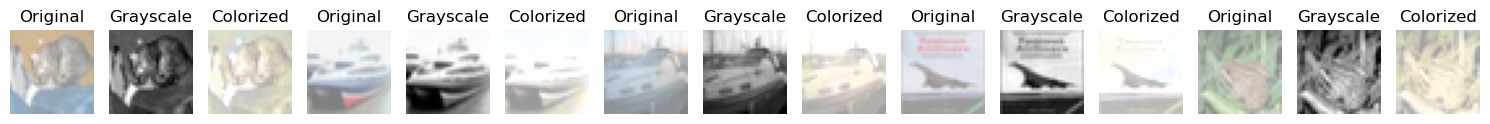

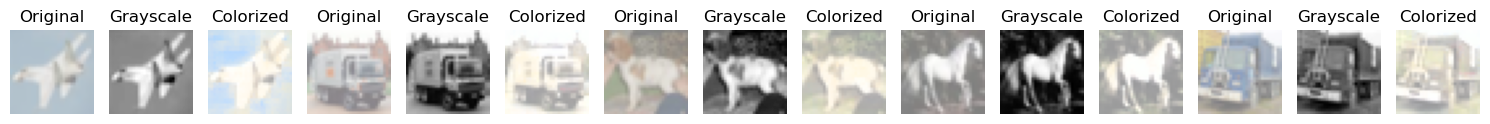

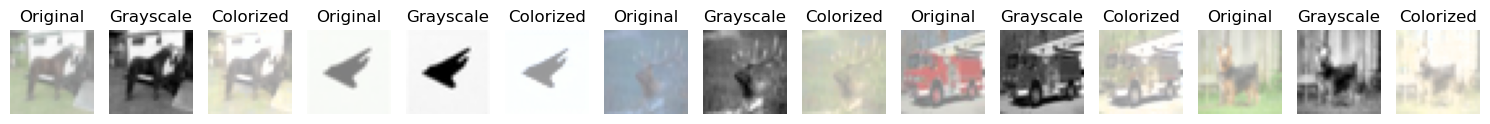

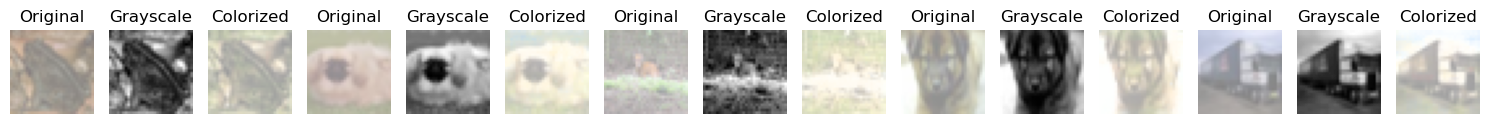

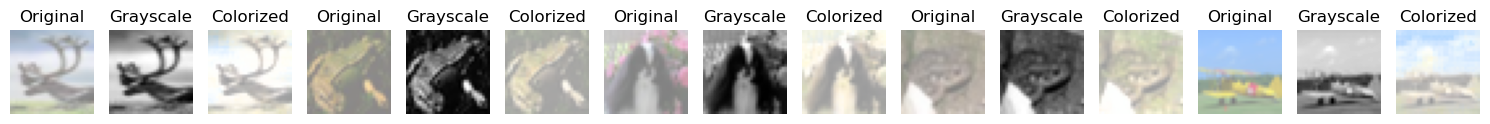

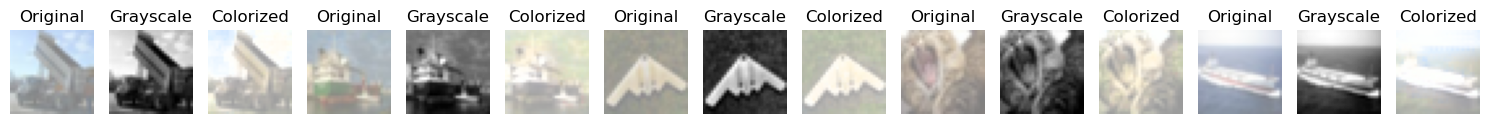

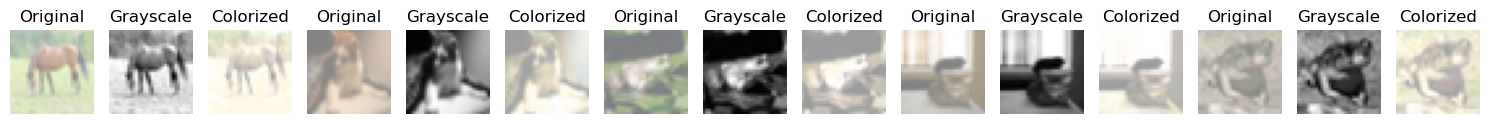

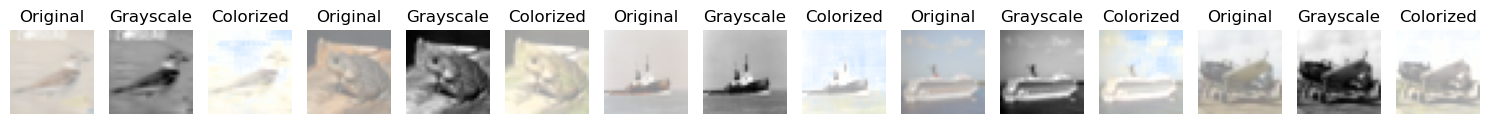

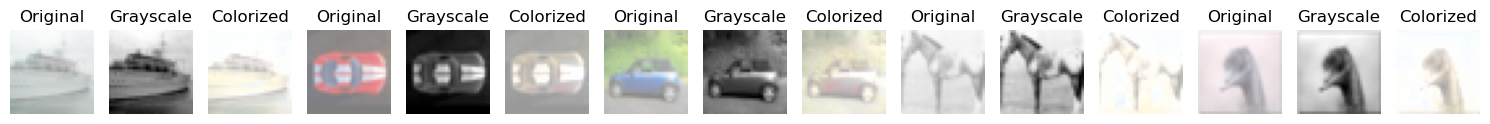

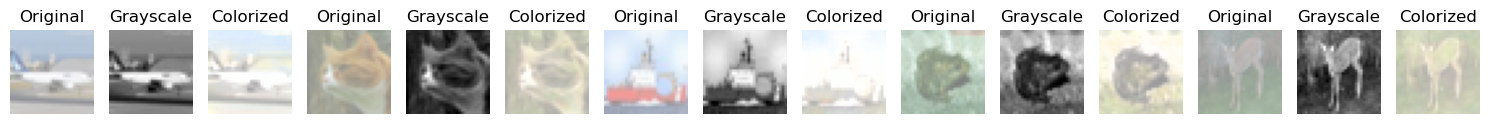

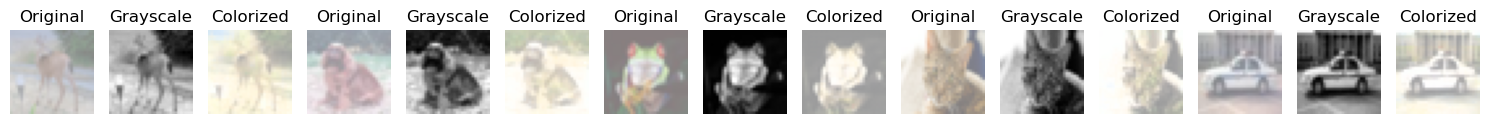

In [199]:
with torch.no_grad():
    for i, (images, _) in enumerate(test_loader):
        grayscale_images = rgb_to_gray(images).to(device)
        colorized_images = model(grayscale_images)

        # Convert the tensors back to CPU for visualization
        grayscale_images_cpu = grayscale_images.cpu().squeeze(1)  # remove the color channel
        colorized_images_cpu = colorized_images.cpu()
        original_images_cpu = images.cpu()

        #colorized_images_cpu=scale_predicted_colors(colorized_images_cpu)
        colorized_images_cpu=exaggerate_colors(colorized_images_cpu)

        # Visualize the grayscale, colorized, and original images
        visualize_all_three(original_images_cpu, grayscale_images_cpu, colorized_images_cpu)

        if i == 10:  # only do this for up to certain batch for demonstration purposes
            break

In [200]:
from PIL import Image

# Open the image. (Keep your image in the current directory. In my case, the image was horse.jpg)
img = Image.open("./woman.jpg")
img = img.resize((128,128))
# Convert the image to grayscale
gray_img = img.convert("L")
#eventuell folgendes nutzen, damit training und test gleiches preprocessing haben
#gray_img= rgb_to_gray(images).to(device)

In [201]:
import torchvision.transforms as transforms

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    # If you need to normalize, uncomment the following line
    # transforms.Normalize(mean=[0.5], std=[0.5])  # Assuming you want to normalize to [-1, 1] range
])

In [202]:
# Apply the transformations
img_tensor = transform(gray_img).unsqueeze(0)  # Add a batch dimension

# Ensure the model is in evaluation mode
model.eval()

# Move the image tensor to the device where your model is (likely 'cuda' if using GPU)
img_tensor = img_tensor.to(device)

# Get the model's output
with torch.no_grad():
    colorized_tensor = model(img_tensor)
    print(colorized_tensor)


tensor([[[[0.8135, 0.8118, 0.8296,  ..., 0.8029, 0.8097, 0.7714],
          [0.7972, 0.7999, 0.8153,  ..., 0.7807, 0.7950, 0.7806],
          [0.7969, 0.8019, 0.8104,  ..., 0.7995, 0.8037, 0.7804],
          ...,
          [0.1168, 0.1269, 0.1752,  ..., 0.4584, 0.4541, 0.4779],
          [0.0528, 0.0643, 0.0823,  ..., 0.3264, 0.4326, 0.5089],
          [0.0356, 0.0551, 0.0707,  ..., 0.2065, 0.2441, 0.3944]],

         [[0.8517, 0.8536, 0.8618,  ..., 0.8519, 0.8503, 0.8465],
          [0.8541, 0.8497, 0.8525,  ..., 0.8428, 0.8473, 0.8317],
          [0.8497, 0.8533, 0.8525,  ..., 0.8496, 0.8503, 0.8411],
          ...,
          [0.1204, 0.1253, 0.1682,  ..., 0.4060, 0.4458, 0.4653],
          [0.0546, 0.0718, 0.0875,  ..., 0.3126, 0.4338, 0.4900],
          [0.0405, 0.0631, 0.0751,  ..., 0.1961, 0.2470, 0.3861]],

         [[0.8841, 0.8997, 0.8898,  ..., 0.9000, 0.8971, 0.9058],
          [0.8966, 0.8905, 0.8855,  ..., 0.9018, 0.8918, 0.8822],
          [0.8864, 0.8965, 0.8903,  ..., 0

In [203]:
# Convert the tensor back to an image
colorized_img = transforms.ToPILImage()(colorized_tensor.squeeze(0))

# Optionally, save the image
#colorized_img.save("./horse_colorized.jpg")

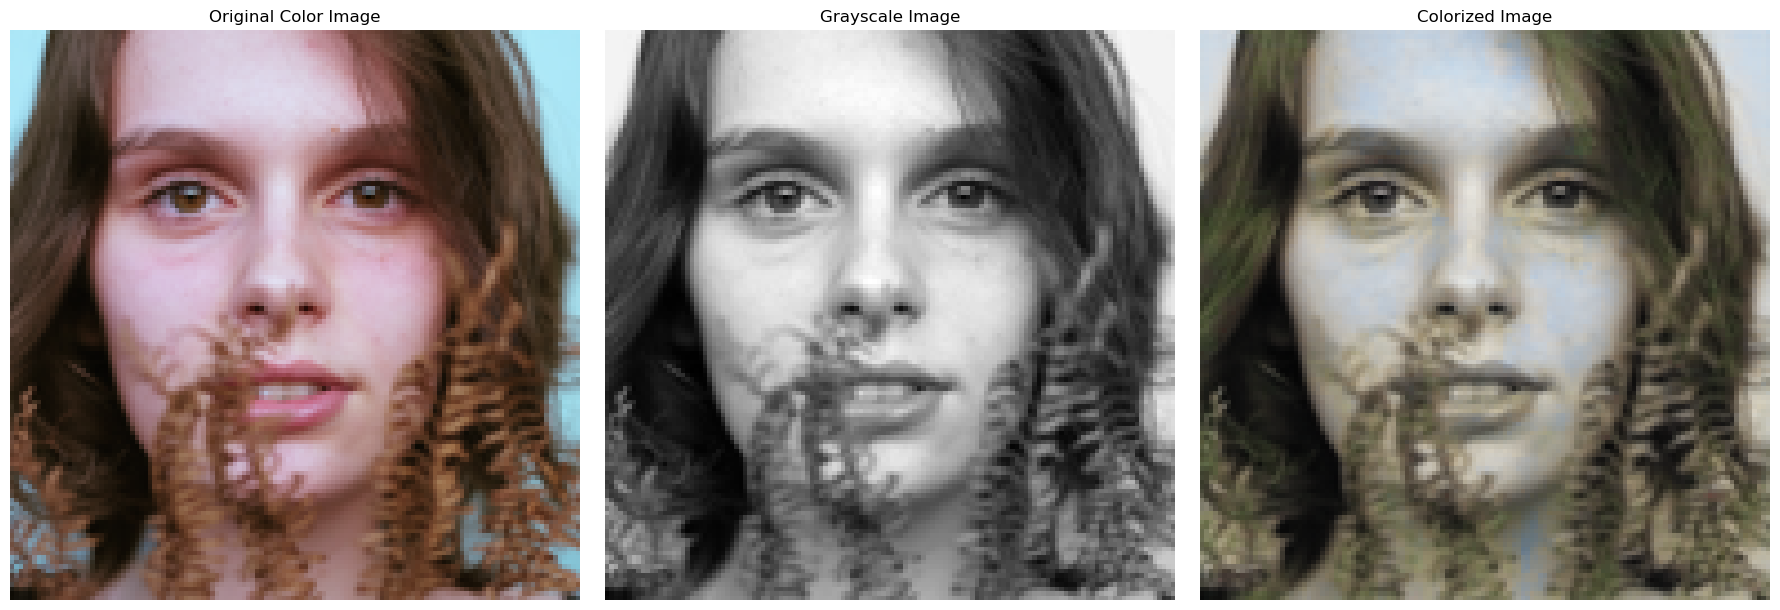

In [204]:
# Plotting the original, grayscale, and colorized images side-by-side
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Create a figure with 1 row and 3 columns

# Display original color image
ax[0].imshow(img)
ax[0].set_title("Original Color Image")
ax[0].axis('off')  # Hide axes

# Display grayscale image
ax[1].imshow(gray_img, cmap='gray')  # Since it's grayscale, use cmap='gray'
ax[1].set_title("Grayscale Image")
ax[1].axis('off')  # Hide axes

# Display colorized image
ax[2].imshow(colorized_img)
ax[2].set_title("Colorized Image")
ax[2].axis('off')  # Hide axes

plt.tight_layout()  # Adjust spacing
plt.show()

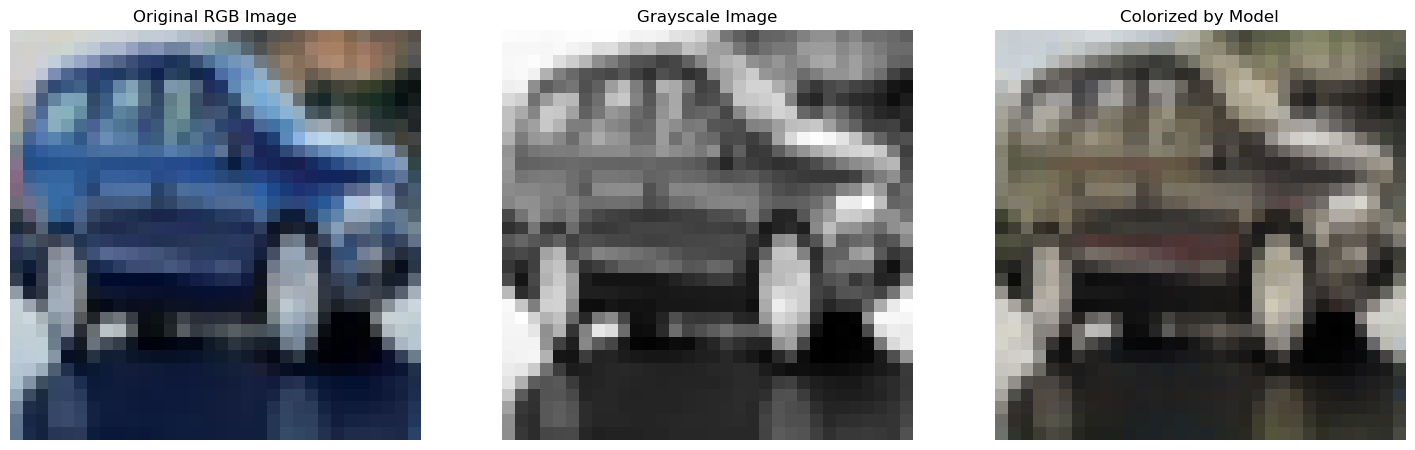

In [205]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Funktion zum Umwandeln eines Torch-Tensors in ein Numpy-Array
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = np.transpose(image, (1, 2, 0))  # Von (C, H, W) zu (H, W, C)
    image = np.clip(image, 0, 1)  # Werte zwischen 0 und 1 setzen
    return image

# Visualisierungsfunktion
def plot_images(original, grayscale, colorized):
    original_img = im_convert(original[0])  # Originalbild (RGB)
    grayscale_img = im_convert(grayscale[0])  # Graustufenbild
    colorized_img = im_convert(colorized[0])  # Vom Modell eingefärbtes Bild
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    # Originalbild
    ax[0].imshow(original_img)
    ax[0].set_title("Original RGB Image")
    ax[0].axis('off')
    
    # Grauwertbild
    ax[1].imshow(grayscale_img, cmap='gray')
    ax[1].set_title("Grayscale Image")
    ax[1].axis('off')
    
    # Vom Modell eingefärbtes Bild
    ax[2].imshow(colorized_img)
    ax[2].set_title("Colorized by Model")
    ax[2].axis('off')
    
    plt.show()

# Beispiel: Zeige ein Bild, graues Bild und das durch das Modell eingefärbte Bild an
model.eval()  # Schalte das Modell in den Evaluierungsmodus

with torch.no_grad():  # Keine Gradient-Berechnung nötig
    for i, (images, _) in enumerate(train_loader):
        grayscale_images = rgb_to_gray(images).to(device)
        images = images.to(device)

        # Vorhersage durch das Modell
        outputs = model(grayscale_images)

        # Plotte das Original, das Grauwertbild und das eingefärbte Bild
        plot_images(images, grayscale_images, outputs)
        break  # Nur für ein Beispiel, damit die Schleife nicht endlos läuft
